In [41]:
from tdc.multi_pred import PPI
import random
import numpy as np
np.random.seed(2022) 
random.seed(2022)
data = PPI(name = 'HuRI')
data = data.neg_sample(frac = 1)
split = data.get_split(seed=2022)

Found local copy...
Loading...
Done!


In [56]:
split['train'].sample(4096, random_state=2022).to_csv("../../data/downstream/tdc_ppi_6k_train.csv")

In [57]:
split['valid'].sample(1024, random_state=2022).to_csv("../../data/downstream/tdc_ppi_6k_valid.csv")

In [58]:
split['test'].sample(1024, random_state=2022).to_csv("../../data/downstream/tdc_ppi_6k_test.csv")

In [2]:
import pandas as pd
df = pd.read_csv("../../data/downstream/tdc_ppi_6k_test.csv")

In [ ]:
df["Protein1"].apply(lambda x:" ".join(x)).values[:100]
sequences_Example = [re.sub(r"[UZOB]", "X", sequence) for sequence in sequences_Example]

In [64]:
!ls ../../data/pretrain

README.txt	  disgenet_gda.csv  string_ppi_900_2m.csv
disgenet_dda.csv  string_ppi.csv    string_ppi_920_300k.csv


In [75]:
base_url = "../../data/pretrain/"
file_name = "disgenet_dda.csv"
df = pd.read_csv(base_url+file_name, index_col=None).dropna()
df.head()

,diseaseId2,diseaseId1,source,Ngenes,NgenesD1,NgenesD2,union_genes,jaccard_genes,Nvariants,NvariantsD1,NvariantsD2,union_variant,jaccard_variant,diseaseId1_name,diseaseId2_name,diseaseDes1,diseaseDes2
0,C0000731,C0000737,CURATED,0.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,16.0,0.062500,Abdominal Pain,Abdomen distended,An unpleasant sensation characterized by physi...,Distention of the abdomen.
1,C0000731,C0005745,CURATED,0.0,0.0,0.0,0.0,0.0,1.0,49.0,6.0,54.0,0.018519,Blepharoptosis,Abdomen distended,The upper eyelid margin is positioned 3 mm or ...,Distention of the abdomen.
2,C0000731,C0006325,CURATED,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,11.0,0.090909,Bruxism,Abdomen distended,Bruxism is characterized by the grinding of th...,Distention of the abdomen.
3,C0000731,C0007642,CURATED,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,6.0,0.166667,Cellulitis,Abdomen distended,A bacterial infection and inflammation of the ...,Distention of the abdomen.
4,C0000731,C0009806,CURATED,0.0,0.0,0.0,0.0,0.0,1.0,49.0,6.0,54.0,0.018519,Constipation,Abdomen distended,Infrequent or difficult evacuation of feces.,Distention of the abdomen.


In [76]:
df["len1"] =df["diseaseDes1"].apply(lambda x: len(x.split(" ")))
df["len2"] =df["diseaseDes2"].apply(lambda x: len(x.split(" ")))

<AxesSubplot:>

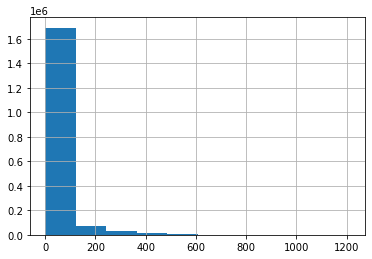

In [80]:
df["len1"].hist()

In [22]:
import pandas as pd
import re

def format_seq(x):
    x = re.sub(r"[UZOB\*]", "X", x)
    if " " not in x:
        x= " ".join(x)
    return x

def process_col(df,cols):
    for col in cols:
        df[col] = df[col].apply(format_seq)
    return df

In [70]:
base_url = "../../data/pretrain/"
file_name = "string_ppi.csv"
df = pd.read_csv(base_url+file_name, index_col=None)
df.head()

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,item_seq_a,item_seq_b
0,9606.ENSP00000000233,9606.ENSP00000216366,binding,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
1,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,f,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
2,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,f,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
3,9606.ENSP00000000233,9606.ENSP00000216366,reaction,NaN,t,t,165,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MIKFFLMVNKQGQTRLSKYYEHVDINKRTLLETEVIKSCLSRSNEQ...
4,9606.ENSP00000000233,9606.ENSP00000222547,binding,NaN,f,f,913,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...


In [71]:
df = process_col(df,['item_seq_a','item_seq_b'])
df.to_csv(base_url+file_name,index=None)

In [72]:
base_url = "../../data/pretrain/"
file_name = "string_ppi_920_300k.csv"
df = pd.read_csv(base_url+file_name, index_col=None)
df = process_col(df,['item_seq_a','item_seq_b'])
df.to_csv(base_url+file_name,index=None)